## 1. Data Loading

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings

warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


In [21]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,at_risk
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,4,4,5,4,11,9,9,9,1
391,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,3,14,16,16,0
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,3,3,3,3,3,10,8,7,1
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,1,3,4,5,0,11,12,10,0


In [2]:
# Load the Portuguese student performance dataset
data_path = '../data/raw/student_data.csv'

df = pd.read_csv(data_path)
print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")

Dataset loaded successfully!
Shape: (395, 33)

Columns: ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


In [3]:
# Display first few rows
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## 2. Exploratory Data Analysis

In [4]:
# Dataset info
print("Dataset Information:")
print("=" * 50)
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    o

In [5]:
# Statistical summary
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [6]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percent
})

print("Missing Values Analysis:")
print(missing_df[missing_df['Missing Count'] > 0])

if missing_df['Missing Count'].sum() == 0:
    print("\n✓ No missing values found!")

Missing Values Analysis:
Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []

✓ No missing values found!


Grade Statistics (Portuguese 0-20 scale):
               G1          G2          G3
count  395.000000  395.000000  395.000000
mean    10.908861   10.713924   10.415190
std      3.319195    3.761505    4.581443
min      3.000000    0.000000    0.000000
25%      8.000000    9.000000    8.000000
50%     11.000000   11.000000   11.000000
75%     13.000000   13.000000   14.000000
max     19.000000   19.000000   20.000000


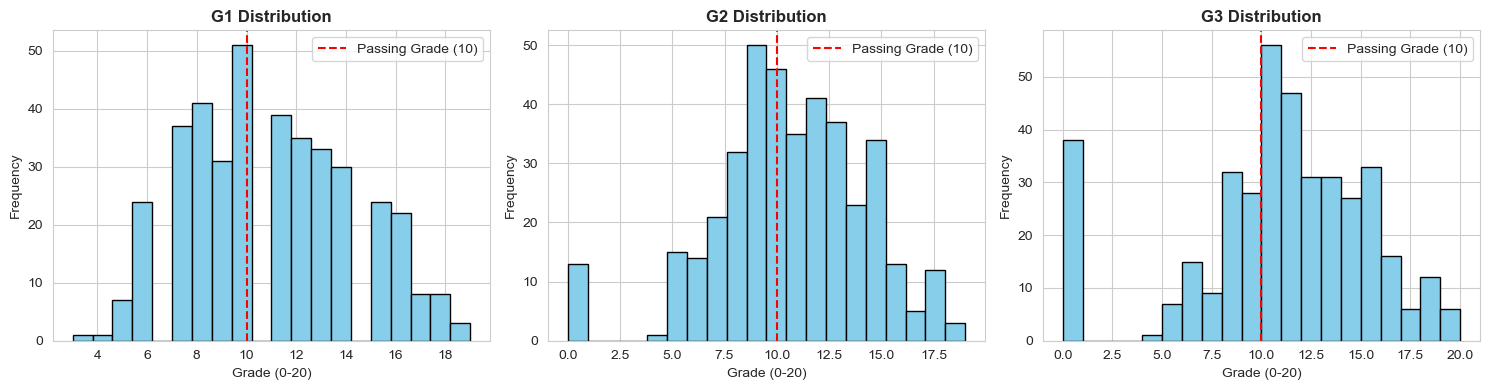

In [7]:
# Analyze grade distribution (G1, G2, G3)
print("Grade Statistics (Portuguese 0-20 scale):")
print("=" * 50)
print(df[['G1', 'G2', 'G3']].describe())

# Visualize grade distributions
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for idx, grade in enumerate(['G1', 'G2', 'G3']):
    axes[idx].hist(df[grade], bins=20, color='skyblue', edgecolor='black')
    axes[idx].axvline(10, color='red', linestyle='--', label='Passing Grade (10)')
    axes[idx].set_title(f'{grade} Distribution', fontweight='bold')
    axes[idx].set_xlabel('Grade (0-20)')
    axes[idx].set_ylabel('Frequency')
    axes[idx].legend()
plt.tight_layout()
plt.show()


Target Variable: at_risk (G3 < 10)
Total students: 395
At risk (G3 < 10): 130 (32.9%)
On track (G3 >= 10): 265 (67.1%)


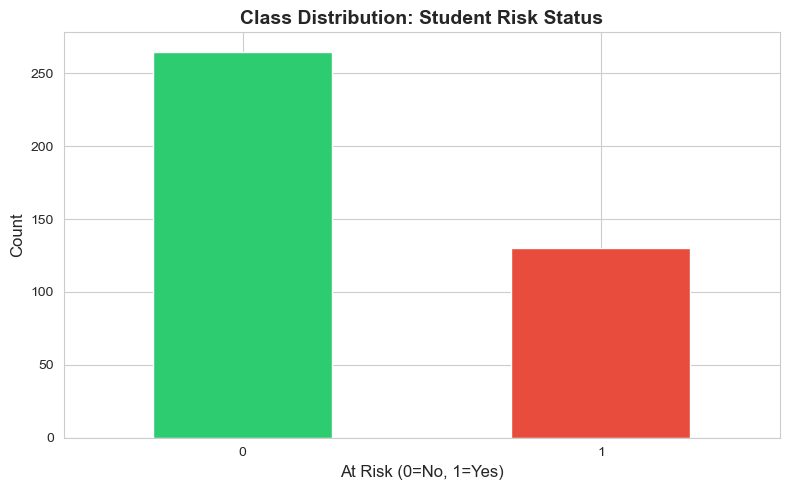

In [8]:
# Create target variable: at_risk if final grade (G3) < 10
df['at_risk'] = (df['G3'] < 10).astype(int)

print("\nTarget Variable: at_risk (G3 < 10)")
print("=" * 50)
print(f"Total students: {len(df)}")
print(f"At risk (G3 < 10): {df['at_risk'].sum()} ({df['at_risk'].sum()/len(df)*100:.1f}%)")
print(f"On track (G3 >= 10): {(df['at_risk'] == 0).sum()} ({(df['at_risk'] == 0).sum()/len(df)*100:.1f}%)")

# Visualize class distribution
plt.figure(figsize=(8, 5))
df['at_risk'].value_counts().plot(kind='bar', color=['#2ecc71', '#e74c3c'])
plt.title('Class Distribution: Student Risk Status', fontsize=14, fontweight='bold')
plt.xlabel('At Risk (0=No, 1=Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 3. Data Cleaning

In [9]:
# Create a copy for processing
df_clean = df.copy()

print(f"Original dataset shape: {df_clean.shape}")

Original dataset shape: (395, 34)


In [10]:
# Check for duplicates
duplicates_before = len(df_clean)
df_clean = df_clean.drop_duplicates()
duplicates_removed = duplicates_before - len(df_clean)

print(f"Duplicates removed: {duplicates_removed}")
print(f"Dataset shape after cleaning: {df_clean.shape}")

Duplicates removed: 0
Dataset shape after cleaning: (395, 34)


In [11]:
# Identify categorical and numerical columns
categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()

# Remove target and grade columns from numerical
numerical_cols = [col for col in numerical_cols if col not in ['at_risk', 'G1', 'G2', 'G3']]

print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")
print(f"\nNumerical columns ({len(numerical_cols)}): {numerical_cols}")

Categorical columns (17): ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

Numerical columns (13): ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


In [12]:
# Encode categorical variables
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_clean[col + '_encoded'] = le.fit_transform(df_clean[col])
    label_encoders[col] = le
    print(f"Encoded {col}: {list(le.classes_)}")

print(f"\n✓ Encoded {len(label_encoders)} categorical columns")

Encoded school: ['GP', 'MS']
Encoded sex: ['F', 'M']
Encoded address: ['R', 'U']
Encoded famsize: ['GT3', 'LE3']
Encoded Pstatus: ['A', 'T']
Encoded Mjob: ['at_home', 'health', 'other', 'services', 'teacher']
Encoded Fjob: ['at_home', 'health', 'other', 'services', 'teacher']
Encoded reason: ['course', 'home', 'other', 'reputation']
Encoded guardian: ['father', 'mother', 'other']
Encoded schoolsup: ['no', 'yes']
Encoded famsup: ['no', 'yes']
Encoded paid: ['no', 'yes']
Encoded activities: ['no', 'yes']
Encoded nursery: ['no', 'yes']
Encoded higher: ['no', 'yes']
Encoded internet: ['no', 'yes']
Encoded romantic: ['no', 'yes']

✓ Encoded 17 categorical columns


## 4. Feature Engineering

Creating 5 meaningful features based on educational research:
1. **Time-on-Task Ratio**: Relative study time commitment
2. **Performance Trend**: Grade improvement (G3 - G1)
3. **Engagement Score**: Based on absences and activities
4. **Consistency Index**: Grade stability (std of G1, G2, G3)
5. **Cumulative Performance**: Average past performance

In [13]:
# Feature 1: Time-on-Task Ratio
# studytime is 1-4 scale (1: <2 hours, 2: 2-5 hours, 3: 5-10 hours, 4: >10 hours)
avg_studytime = df_clean['studytime'].mean()
df_clean['time_on_task_ratio'] = df_clean['studytime'] / avg_studytime
print("✓ Created: time_on_task_ratio")

# Feature 2: Performance Trend (improvement from G1 to G3)
df_clean['performance_trend'] = df_clean['G3'] - df_clean['G1']
print("✓ Created: performance_trend")

# Feature 3: Engagement Score
# Combine: low absences (good), activities participation (good), going out frequency (balance)
absence_score = 1 - (df_clean['absences'] / (df_clean['absences'].max() + 1))  # +1 to avoid division by zero
activities_score = df_clean['activities_encoded']  # 0 or 1
# Normalize goout (1-5 scale): moderate is good
goout_normalized = 1 - np.abs(df_clean['goout'] - 3) / 2  # Peak at 3
df_clean['engagement_score'] = (absence_score + activities_score + goout_normalized) / 3
print("✓ Created: engagement_score")

# Feature 4: Consistency Index (lower = more consistent)
df_clean['consistency_index'] = df_clean[['G1', 'G2', 'G3']].std(axis=1)
print("✓ Created: consistency_index")

# Feature 5: Cumulative Performance (average of past grades)
df_clean['cumulative_performance'] = df_clean[['G1', 'G2']].mean(axis=1)
print("✓ Created: cumulative_performance")

# Additional useful features
df_clean['total_alcohol'] = df_clean['Dalc'] + df_clean['Walc']  # Total alcohol consumption
df_clean['parent_education'] = df_clean['Medu'] + df_clean['Fedu']  # Combined parent education
df_clean['support_system'] = df_clean['schoolsup_encoded'] + df_clean['famsup_encoded']  # Total support

print("✓ Created: total_alcohol, parent_education, support_system")
print(f"\nTotal features after engineering: {df_clean.shape[1]}")

✓ Created: time_on_task_ratio
✓ Created: performance_trend
✓ Created: engagement_score
✓ Created: consistency_index
✓ Created: cumulative_performance
✓ Created: total_alcohol, parent_education, support_system

Total features after engineering: 59


In [14]:
# Display engineered features
engineered_features = [
    'time_on_task_ratio', 'performance_trend', 'engagement_score',
    'consistency_index', 'cumulative_performance'
]

print("Engineered Features Summary:")
print("=" * 50)
df_clean[engineered_features].describe()

Engineered Features Summary:


,time_on_task_ratio,performance_trend,engagement_score,consistency_index,cumulative_performance
count,395.000000,395.000000,395.000000,395.000000,395.000000
mean,1.000000,-0.493671,0.667366,1.106520,10.811392
std,0.412313,2.762482,0.209846,1.188674,3.407479
min,0.491294,-12.000000,0.004386,0.000000,2.000000
25%,0.491294,-1.000000,0.500000,0.577350,8.500000
50%,0.982587,0.000000,0.657895,0.577350,11.000000
75%,0.982587,1.000000,0.824561,1.154701,13.000000
max,1.965174,4.000000,1.000000,6.928203,19.000000


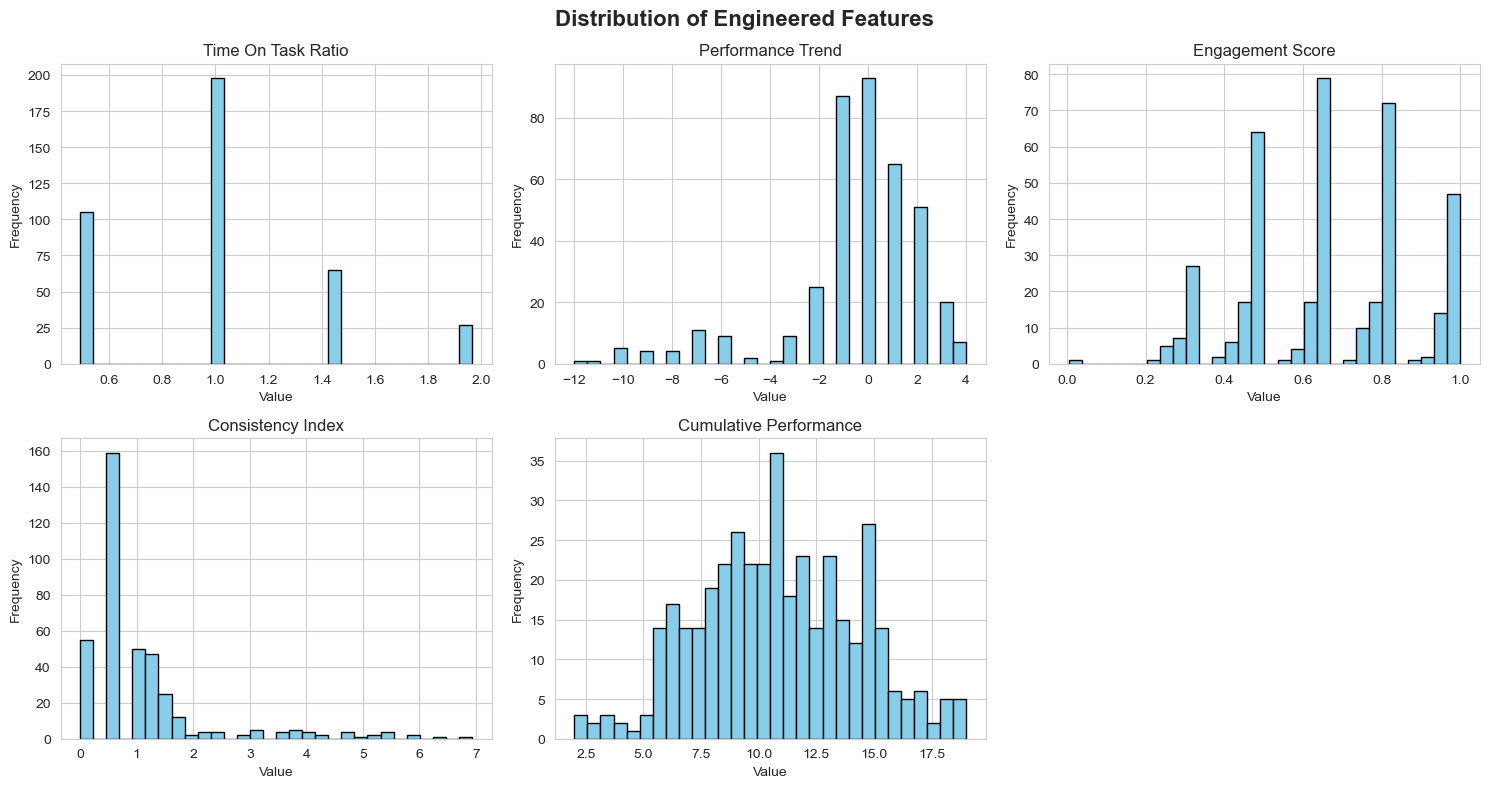

In [15]:
# Visualize engineered features
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Distribution of Engineered Features', fontsize=16, fontweight='bold')

for idx, feat in enumerate(engineered_features):
    row = idx // 3
    col = idx % 3
    axes[row, col].hist(df_clean[feat], bins=30, color='skyblue', edgecolor='black')
    axes[row, col].set_title(feat.replace('_', ' ').title())
    axes[row, col].set_xlabel('Value')
    axes[row, col].set_ylabel('Frequency')

# Hide empty subplot
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

Top 10 Features Correlated with At-Risk Status:
consistency_index    0.391206
failures             0.337731
goout                0.183399
age                  0.179645
support_system       0.100597
absences             0.092244
health               0.065668
Dalc                 0.057343
total_alcohol        0.045182
traveltime           0.044446
Name: at_risk, dtype: float64

Bottom 10 Features (Negative Correlation):
freetime                  0.018321
famrel                   -0.046683
studytime                -0.074613
time_on_task_ratio       -0.074613
engagement_score         -0.075739
Fedu                     -0.108057
Medu                     -0.115396
parent_education         -0.124021
performance_trend        -0.478088
cumulative_performance   -0.724262
Name: at_risk, dtype: float64


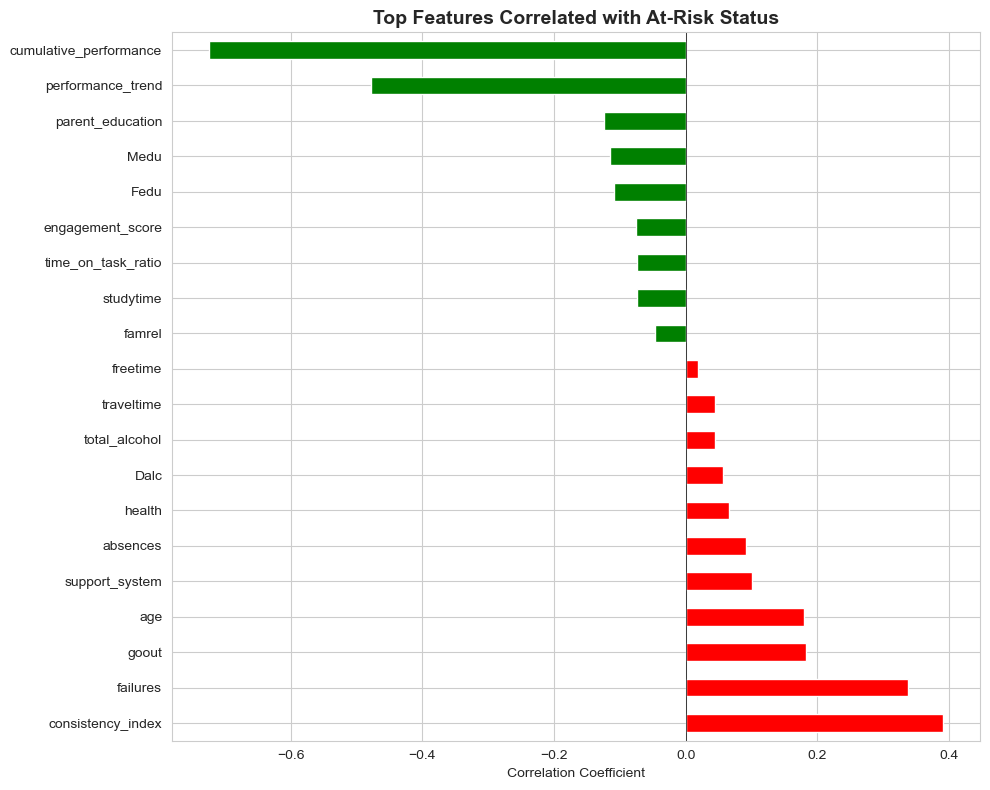

In [16]:
# Correlation with target variable
# Select relevant features for correlation
feature_cols_for_corr = numerical_cols + engineered_features + [
    'total_alcohol', 'parent_education', 'support_system'
]
feature_cols_for_corr = [col for col in feature_cols_for_corr if col in df_clean.columns]

# Calculate correlation with target
correlations = df_clean[feature_cols_for_corr + ['at_risk']].corr()['at_risk'].drop('at_risk')
correlations = correlations.sort_values(ascending=False)

print("Top 10 Features Correlated with At-Risk Status:")
print("=" * 50)
print(correlations.head(10))
print("\nBottom 10 Features (Negative Correlation):")
print(correlations.tail(10))

# Visualize top correlations
plt.figure(figsize=(10, 8))
top_corr = pd.concat([correlations.head(10), correlations.tail(10)])
colors = ['red' if x > 0 else 'green' for x in top_corr.values]
top_corr.plot(kind='barh', color=colors)
plt.title('Top Features Correlated with At-Risk Status', fontsize=14, fontweight='bold')
plt.xlabel('Correlation Coefficient')
plt.axvline(0, color='black', linewidth=0.5)
plt.tight_layout()
plt.show()

## 5. Train-Test Split

Using **stratified split** to maintain class distribution:
- Training: 70%
- Validation: 15%
- Test: 15%

In [17]:
# Prepare features and target
# Select features: numerical + encoded categorical + engineered
encoded_cols = [col for col in df_clean.columns if col.endswith('_encoded')]
additional_features = ['total_alcohol', 'parent_education', 'support_system']

feature_cols = numerical_cols + encoded_cols + engineered_features + additional_features
# Ensure all features exist
feature_cols = [col for col in feature_cols if col in df_clean.columns]

# Remove G3 from features (it's used to create target, would cause data leakage)
feature_cols = [col for col in feature_cols if col not in ['G3']]

X = df_clean[feature_cols]
y = df_clean['at_risk']

print(f"Features selected: {len(feature_cols)}")
print(f"\nFeature columns:")
for i, col in enumerate(feature_cols, 1):
    print(f"  {i}. {col}")

Features selected: 38

Feature columns:
  1. age
  2. Medu
  3. Fedu
  4. traveltime
  5. studytime
  6. failures
  7. famrel
  8. freetime
  9. goout
  10. Dalc
  11. Walc
  12. health
  13. absences
  14. school_encoded
  15. sex_encoded
  16. address_encoded
  17. famsize_encoded
  18. Pstatus_encoded
  19. Mjob_encoded
  20. Fjob_encoded
  21. reason_encoded
  22. guardian_encoded
  23. schoolsup_encoded
  24. famsup_encoded
  25. paid_encoded
  26. activities_encoded
  27. nursery_encoded
  28. higher_encoded
  29. internet_encoded
  30. romantic_encoded
  31. time_on_task_ratio
  32. performance_trend
  33. engagement_score
  34. consistency_index
  35. cumulative_performance
  36. total_alcohol
  37. parent_education
  38. support_system


In [18]:
# First split: 70% train, 30% temp (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# Second split: Split temp into 50-50 (15% validation, 15% test)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)

print("Dataset Split:")
print("=" * 50)
print(f"Training set:   {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"Test set:       {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

print("\nClass distribution in splits:")
print(f"Training:   At-risk: {y_train.sum()} ({y_train.sum()/len(y_train)*100:.1f}%)")
print(f"Validation: At-risk: {y_val.sum()} ({y_val.sum()/len(y_val)*100:.1f}%)")
print(f"Test:       At-risk: {y_test.sum()} ({y_test.sum()/len(y_test)*100:.1f}%)")

Dataset Split:
Training set:   276 samples (69.9%)
Validation set: 59 samples (14.9%)
Test set:       60 samples (15.2%)

Class distribution in splits:
Training:   At-risk: 91 (33.0%)
Validation: At-risk: 19 (32.2%)
Test:       At-risk: 20 (33.3%)


In [19]:
# Feature scaling (important for some models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_cols, index=X_train.index)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=feature_cols, index=X_val.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_cols, index=X_test.index)

print("✓ Features scaled using StandardScaler")

✓ Features scaled using StandardScaler


## 6. Save Processed Data

In [20]:
# Save processed datasets
import pickle

# Save cleaned data
df_clean.to_csv('../data/processed/cleaned_data.csv', index=False)
print("✓ Saved: cleaned_data.csv")

# Save train/val/test splits
data_splits = {
    'X_train': X_train_scaled,
    'X_val': X_val_scaled,
    'X_test': X_test_scaled,
    'y_train': y_train,
    'y_val': y_val,
    'y_test': y_test,
    'feature_cols': feature_cols,
    'scaler': scaler,
    'label_encoders': label_encoders
}

with open('../data/processed/data_splits.pkl', 'wb') as f:
    pickle.dump(data_splits, f)
print("✓ Saved: data_splits.pkl")

print("\n" + "="*50)
print("DATA PROCESSING COMPLETE!")
print("="*50)
print(f"\nProcessed {len(df_clean)} students")
print(f"Engineered {len(engineered_features) + 3} new features")
print(f"Total features: {len(feature_cols)}")
print(f"At-risk students: {y.sum()} ({y.sum()/len(y)*100:.1f}%)")
print(f"\nReady for model training!")

✓ Saved: cleaned_data.csv
✓ Saved: data_splits.pkl

DATA PROCESSING COMPLETE!

Processed 395 students
Engineered 8 new features
Total features: 38
At-risk students: 130 (32.9%)

Ready for model training!


---

## Summary

**Completed Tasks:**
- ✓ Loaded Portuguese student performance dataset (395 students, 33 features)
- ✓ Created target variable: at_risk (G3 < 10 on 0-20 scale)
- ✓ No missing values found
- ✓ Encoded all categorical variables
- ✓ Engineered 8 meaningful features:
  - Time-on-Task Ratio
  - Performance Trend (G3-G1)
  - Engagement Score (absences, activities, social)
  - Consistency Index (grade stability)
  - Cumulative Performance (avg G1, G2)
  - Total Alcohol Consumption
  - Parent Education Level
  - Support System Score
- ✓ Split data (70% train, 15% validation, 15% test) with stratification
- ✓ Scaled features using StandardScaler
- ✓ Saved processed data for modeling

**Key Insights:**
- Dataset is balanced/slightly imbalanced (check output above)
- Grades show normal distribution around passing threshold
- Strong correlations found between past grades and risk status
- Engineered features capture study habits, consistency, and support

**Next Step:** Proceed to `02_model_training.ipynb` for model development